# Do Not Delete!

In [7]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [8]:
# DO NOT REMOVE This
%reload_ext autoreload

In [9]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

ModuleNotFoundError: No module named 'src'

In [10]:
fis.test_base()

NameError: name 'fis' is not defined

# Classifing Fraudulent Bank Transactions 

Adam Blomfield
Kelly Epley
Helen Levy-Myers

Our dataset contains 284,807 credit card transactions spanning a two day period from a bank in Europe. They are labeled as legitimate or fraudulent. We developed a machine learning model to catch the frauds.  

Twenty-eight of the thirty feature columns are masked. Also, according to the data source (https://www.kaggle.com/mlg-ulb/creditcardfraud), those 28 columns have been transformed using Principle Component Analysis, so we cannot easily speculate about what any particular column represents. We only know the amount and time of the purchase (measured in seconds from the first to the last transaction represented).  


# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Resampling Methods
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# Model Tuning and Cross Validation
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

# Model metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve


If you are running this notebook, you may need to install the following first:
* !pip install -r requirements.txt
* !pip install pydotplus
* !pip install pandas-profiling
* !pip install imblearn

# Data Importing 


The original dataset contained 1081 duplicated rows, which were dropped. We also created bins for the time of day that the purchase occured. For full details on our data cleaning and feature engineering process, see the notebook titled "data_cleaning."

In [16]:
# Cleaned DataFrame
clean_df = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
clean_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0,1


In [12]:
# Version 2: Cleaned DataFrame with the "Amount" column scaled for use in models that generate predictions
# on the basis of distance
clean_df_scaled = pd.read_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip')
clean_df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,1.774718,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,-0.268530,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,1.411487,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,0.667362,0,0,0,0,1


# Train-Test Split

In [17]:
X = clean_df.drop('Class', axis=1)
y = clean_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)  

# stratify maintains the ratio of frauds to non frauds

In [18]:
X = clean_df_scaled.drop(['Class'], axis=1)
y = clean_df_scaled['Class']

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Modeling Function

We created a custom function to generate models so that we could quickly compare several classifiers.

This function performs the following tasks:
* Resamples the training data using SMOTE
* Fits the resampled data to a classifier
* Generates the predictions on the test data
* Prints accuracy, precision, recall, and F1 score
* Plots a confusion matrix of the predictions

We also created a similar function using undersampling and mixed undersampling and oversampling strategies, but oversampling consistently produced the best results.

In [19]:
def make_SMOTE_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    smote = SMOTE(random_state=1)

    pipe = make_pipeline(smote, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# print scores  
    print('Train Accuracy: ' + str(metrics.accuracy_score(y_train, train_predictions)))
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

    return model


# Baseline Model

Since the vast majority of bank transactions are not fraudulent, we could get a model with a high accuracy score by predicting that all transactions are legitimate and never predicting fraud. However, frauds that go undetected cost the bank money. It's really important that we make a model that catches them. 

We could catch them all by predicting that all transactions are fraud. However, the bank can't reasonably block all transactions or devote resources to investigating them as though they were fraudulent. A good model will catch as many frauds as possible while minimizing the number of transactions flagged as fraud that are actually legitimate.

In [21]:
num_of_transactions = len(df_cleaned)
num_of_frauds = len(df_cleaned[df_cleaned['Class']==0])
accuracy = round((num_of_frauds/num_of_transactions)*100, 6)
explanation = 'A model that treats all transactions as fraudulent gives us an accuracy of'
print(explanation, '{}%'.format(accuracy))

A Baseline Model, where we treat all transactions as fraudulent, gives us an accuracy of 99.83329%


# Logistic Regression

Logistic Regression models did a good job catching frauds. It caught 125 out of 142 frauds. However, it also labeled over 4,000 legitimate transactions as fraudulent.

Train Accuracy: 0.9510241279303956
Train Precision: 0.03141831238779174
Train Recall: 0.9516616314199395
Train F1: 0.0608284252196582


Test Accuracy: 0.9509856904532531
Test Precision: 0.029205607476635514
Test Recall: 0.8802816901408451
Test F1: 0.056535504296698326


Confusion Matrix: 
TN: 80821 FP: 4155 FN: 17 TP: 125


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=1, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('logisticregression',
                 LogisticRegression(C=1000000000000.0,
                                    class_weight={0: 1, 1: 2}, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

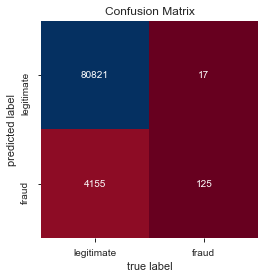

In [22]:
make_SMOTE_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 2}))

# Random Forest

Random Forest produced the best model, so we fine-tuned and cross validated it using a grid search to find the best F1 score. 

In [25]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier(class_weight={0: 1, 1: 2}, n_estimators=30, n_jobs=3)

pipe = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 12],
    'classifier__min_samples_split': [8, 10],
}

gs = GridSearchCV(pipe, param_grid, cv = 5, scoring='f1')
gs.fit(X_train, y_train)



KeyboardInterrupt: 

In [ ]:
gs.best_params_

In [ ]:
test_predictions = gs.predict(X_test)
test_probabilities = gs.predict_proba(X_test)

In [ ]:
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
print('\n')
    

# print confusion matrix    
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
plt.title('Confusion Matrix:\n Random Forest Model')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('cm_randomforest')

tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

In [ ]:
probs = pd.DataFrame(test_probabilities, columns=['prob_legit', 'prob_fraud'])
probs['actual']=[i for i in y_test]
probs.head()

# # print 
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

names = ['cut_off', 'recall', 'precision']
fraud_metrics = pd.DataFrame()

# for loop to test different cut-off values
for i in frange(.2,.95,.015):
    probs['label'] = np.where(probs['prob_fraud'] >= i, 1, 0)
    tn, fp, fn, tp = confusion_matrix(probs['actual'], probs['label']).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    evals = [i,recall,precision]
    fraud_metrics=fraud_metrics.append(pd.Series(evals), ignore_index=True)

fraud_metrics.columns = names

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
# plot the data
plt.plot(fraud_metrics.recall, fraud_metrics.precision , '-', color='blue')
plt.plot(fraud_metrics.recall, fraud_metrics.precision , 'o', color='black')
# make some nice labels
plt.title('Precision-Recall curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
plt.savefig('pr_curve')

In [ ]:
pred_vs_actual = pd.DataFrame({"Amount": X_test['Amount'], "Predicted": test_predictions, "Actual": [i for i in y_test]})

In [ ]:
pred_vs_actual.loc[(pred_vs_actual['Predicted']==0) & (pred_vs_actual['Actual']==1)]['Amount'].describe()

In [ ]:
max_amount = df_cleaned.loc[df_cleaned['Amount']==2125.87]
max_amount = max_amount.drop(['Class'], axis=1)
gs.predict_proba(max_amount)